In [2]:
!date

Sun Mar 19 21:20:47 EDT 2023


In [ ]:
# AMPL imports
import atomsci.ddm.utils.struct_utils as struct_utils
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp

In [172]:
# manipulate data
import pandas as pd

# plot data
import numpy as np
import matplotlib.pyplot as plt
from rdkit.Chem.Descriptors import MolWt, MolLogP
from rdkit import Chem


import tempfile
from rdkit import Chem
from rdkit.Chem import Draw
from itertools import islice
from IPython.display import Image, display

# visualize data
import seaborn as sns
import matplotlib_venn as mpv
from scipy.stats import pearsonr

# set up visualization parameters
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set2")
pal = sns.color_palette()
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['font.size'] = 15

pd.set_option('display.max_columns',(90))
pd.set_option('display.max_rows',(20))
print("Imports Done.")

Imports Done.


In [207]:
target = 'CYP3A4'

In [208]:
root_dir = './../MoDaC/NCI_DOE_Archive/ATOM/Safety_Screen_Targets/'
home_dir = root_dir + target.upper() + '-ampl-1.1.0/'
!ls $home_dir

CHEMBL25-CYP3A4_human_IC50_26Nov2019.txt
cyp3a4_chembl_smiles_active.csv
cyp3a4_chembl_smiles_active_th5.csv
cyp3a4_chembl_testset_base_smiles_union_active.csv
cyp3a4_chembl_testset_base_smiles_union.csv
cyp3a4_dtc_smiles_active.csv
cyp3a4_dtc_smiles_active_th5.csv
cyp3a4_dtc_smiles.csv
cyp3a4_dtc_testset_base_smiles_union_active.csv
cyp3a4_dtc_testset_base_smiles_union.csv
cyp3a4_excape_smiles_active.csv
cyp3a4_excape_smiles_active_th5.csv
cyp3a4_excape_smiles.csv
cyp3a4_excape_testset_base_smiles_union_active.csv
cyp3a4_excape_testset_base_smiles_union.csv
cyp3a4_union_testset_base_smiles.csv
cyp3a4_union_testset_base_smiles_with_mordred_filtered_descriptors.csv
cyp3a4_union_test_smiles_active.csv
cyp3a4_union_test_smiles_active_th5.csv
cyp3a4_union_test_smiles_active_th5_molwt_logp.csv
cyp3a4_union_trainset_base_smiles.csv
cyp3a4_union_trainset_base_smiles_train_valid_test_scaffold_3c072810-f47b-49ef-9365-6ffa9e5bf911.csv
cyp3a4_union_trainset_base_smiles_with_mordred_filtered_descr

## Reading files for each Target 

In [209]:
union_train_df = pd.read_csv(home_dir + target.lower() + '_union_train_smiles_active_th5.csv')
union_train = union_train_df['base_rdkit_smiles'].to_list()
print(len(union_train), len(set(union_train)))
union_train_df.head(2)

17796 17796


,Unnamed: 0,base_rdkit_smiles,compound_id,pIC50,relation,active
0,0,O=C([C@H]1CNCC[C@@]12OCc1cc(F)c(F)cc12)N(Cc1cc...,CHEMBL1923118,5.441849,NaN,1.0
1,1,COc1ccc(-n2c(=O)c(C)nc3cnc(Oc4ccccc4)nc32)cc1,BAARRVDYHOBEOI-UHFFFAOYNA-N,4.800000,<,0.0


In [210]:
union_test_df = pd.read_csv(home_dir + target.lower() + '_union_test_smiles_active_th5.csv')
union_test = union_test_df['base_rdkit_smiles'].to_list()
print(len(union_test), len(set(union_test)))
union_test_df.head(2)

3141 3141


,Unnamed: 0,base_rdkit_smiles,compound_id,pIC50,relation,active
0,0,CC(C)C[C@@H]1C(=O)N[C@H](C2Cc3ccccc3C2)C(=O)N1...,CHEMBL196478,5.39897,NaN,1
1,1,COCC(=O)N[C@@H](Cc1cccc(-c2ncco2)c1)[C@H](O)CN...,CHEMBL2181890,7.00000,NaN,1


## Get molWt and MolLogP

In [211]:
union_train_df['molecular_weight'] = [MolWt(Chem.MolFromSmiles(smi)) for smi in union_train_df['base_rdkit_smiles'].to_list()]
union_train_df['logp'] = [MolLogP(Chem.MolFromSmiles(smi)) for smi in union_train_df['base_rdkit_smiles'].to_list()]
union_train_df.to_csv(home_dir+target.lower()+'_union_train_smiles_active_th5_molwt_logp.csv', index=False)
union_train_df.head(5)

,Unnamed: 0,base_rdkit_smiles,compound_id,pIC50,relation,active,molecular_weight,logp
0,0,O=C([C@H]1CNCC[C@@]12OCc1cc(F)c(F)cc12)N(Cc1cc...,CHEMBL1923118,5.441849,NaN,1.0,500.895,5.16320
1,1,COc1ccc(-n2c(=O)c(C)nc3cnc(Oc4ccccc4)nc32)cc1,BAARRVDYHOBEOI-UHFFFAOYNA-N,4.800000,<,0.0,360.373,3.28502
2,2,COc1ccc(C(C(=O)NC2CCCC2)N(C(=O)c2snc(-c3ccc(F)...,AMKHNFFZBIGCEX-ZYMSVLFVNA-N,4.900000,<,0.0,562.642,6.12600
3,3,CN1CCN(CCCN(C(=O)Nc2ccc(F)c(C(F)(F)F)c2)C2CCC3...,CHEMBL1289614,7.300577,NaN,1.0,543.609,5.30788
4,4,CCOc1cc(C(=O)NC(CC(=O)O)c2ccccc2C)nn1-c1ccccc1F,MLFFCILPEDOIHN-KRWDZBQOSA-N,7.823909,NaN,1.0,411.433,3.66432


In [212]:
union_train_df.molecular_weight.describe()

count    17796.000000
mean       421.882492
std        126.866067
min         68.079000
25%        337.467000
50%        402.496000
75%        481.932750
max       1555.912000
Name: molecular_weight, dtype: float64

In [213]:
union_train_df.logp.describe()

count    17796.000000
mean         3.827835
std          1.488646
min         -6.295800
25%          2.876530
50%          3.773210
75%          4.742900
max         14.139200
Name: logp, dtype: float64

In [214]:
union_test_df['molecular_weight'] = [MolWt(Chem.MolFromSmiles(smi)) for smi in union_test_df['base_rdkit_smiles'].to_list()]
union_test_df['logp'] = [MolLogP(Chem.MolFromSmiles(smi)) for smi in union_test_df['base_rdkit_smiles'].to_list()]
union_test_df.to_csv(home_dir+target.lower()+'_union_test_smiles_active_th5_molwt_logp.csv', index=False)
union_test_df.head(5)

,Unnamed: 0,base_rdkit_smiles,compound_id,pIC50,relation,active,molecular_weight,logp
0,0,CC(C)C[C@@H]1C(=O)N[C@H](C2Cc3ccccc3C2)C(=O)N1...,CHEMBL196478,5.398970,NaN,1,497.586,3.6872
1,1,COCC(=O)N[C@@H](Cc1cccc(-c2ncco2)c1)[C@H](O)CN...,CHEMBL2181890,7.000000,NaN,1,562.711,4.3959
2,2,COc1cc(NC(=O)Cc2c(C(=O)O)[nH]c3ccccc23)cc(OC)c1OC,ZKKZVJGZGNIDEN-GWZBNUJDNA-N,4.900000,<,0,384.388,3.0731
3,3,O=C(Nc1ccc(S(=O)(=O)N2CC3CCC(C2)O3)cc1)[C@@H]1...,CHEMBL3127525,5.464197,NaN,1,413.499,2.3757
4,4,CONC(=O)Nc1ccc(-c2sc3c(c2CN(C)CCn2ccnn2)c(=O)n...,VNISZKLRKNEAMG-PHLAQJRANA-N,5.070000,NaN,1,672.718,4.6138


In [215]:
union_test_df.molecular_weight.describe()

count    3141.000000
mean      424.334782
std       128.567688
min        94.117000
25%       336.395000
50%       404.459000
75%       486.616000
max       997.405000
Name: molecular_weight, dtype: float64

In [216]:
union_test_df.logp.describe()

count    3141.000000
mean        3.784334
std         1.475576
min        -3.011500
25%         2.871200
50%         3.719500
75%         4.681600
max        11.095000
Name: logp, dtype: float64

## Plot molwts 

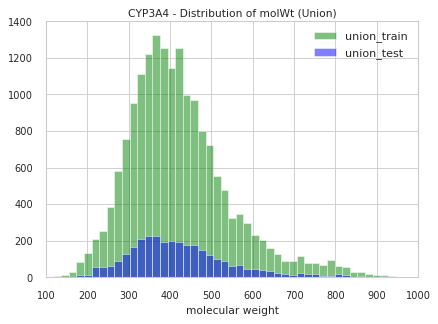

In [217]:
# fig, ax = plt.subplots(figsize = (6,4))
bins = np.linspace(100, 1000, 50)
plt.hist(union_train_df['molecular_weight'].to_numpy(), bins, alpha=0.5, label='union_train', color='g')
plt.hist(union_test_df['molecular_weight'].to_numpy(), bins, alpha=0.5, label='union_test', color='b')
plt.legend(loc='upper right', prop={'size': 10})
plt.title(target.upper()+ " - Distribution of molWt (Union)")
plt.xlabel("molecular weight")
plt.show()

In [218]:
#print(plt.style.available)

## Plot molWt vs pIC50 

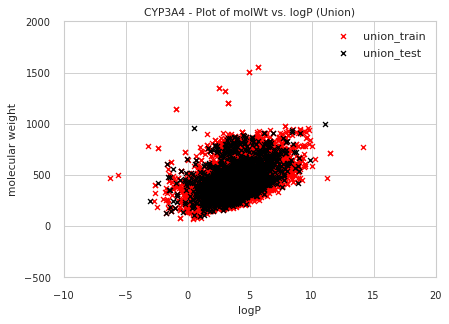

In [221]:
plt.scatter(union_train_df['logp'], union_train_df['molecular_weight'], color='red', marker='x')
plt.scatter(union_test_df['logp'], union_test_df['molecular_weight'], color='black', marker='x')
plt.legend(loc='upper right', prop={'size': 10}, labels=['union_train', 'union_test'])
plt.title(target.upper()+ " - Plot of molWt vs. logP (Union)")
plt.xlabel("logP")
plt.ylabel("molecular weight")
plt.show();

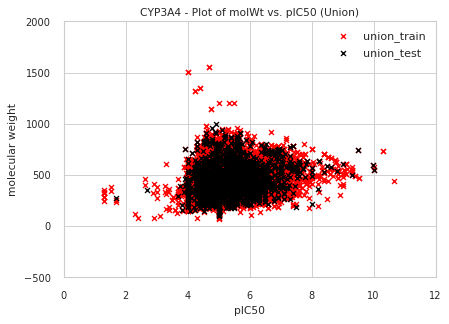

In [220]:
#plt.hist(union_train_df['molecular_weight'].to_numpy(), union_train_df['pIC50'].to_numpy(), color='g')
plt.scatter(union_train_df['pIC50'], union_train_df['molecular_weight'], color='red', marker='x')
plt.scatter(union_test_df['pIC50'], union_test_df['molecular_weight'], color='black', marker='x')
plt.legend(loc='upper right', prop={'size': 10}, labels=['union_train', 'union_test'])
plt.title(target.upper()+ " - Plot of molWt vs. pIC50 (Union)")
plt.xlabel("pIC50")
plt.ylabel("molecular weight")
plt.show();